In [197]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil #move file from one folder to another
import glob

#model training
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
import keras

In [198]:
#count the numver of images in resptctive classes

ROOT_DIR = "brain_mri_scan_images"
no_of_images = {}

for dir in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir)
    if os.path.isdir(dir_path):
        no_of_images[dir] = len(os.listdir(dir_path))

In [199]:
no_of_images.items()

dict_items([('positive', 1), ('negative', 3)])

split data as  
70% train\
15% validation\
15% testing

In [200]:
def datafolder(p, split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),size = (math.floor(split*no_of_images[dir])-2), replace=False):
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./"+p, dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"the {p} folder exists!")

In [201]:
datafolder("train", 0.8)

the train folder exists!


In [202]:
datafolder("val", 0.15)

the val folder exists!


In [203]:
datafolder("test", 0.1)

the test folder exists!


<h3>Model building

In [204]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPool2D
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
import keras

In [205]:
#CNN model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation= 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [206]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

<h4>Preparing data using data generator


In [207]:
def preprocessingImages1(path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function= preprocess_input, horizontal_flip=True) #increasing dimention
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

    return image

In [208]:
path = 'train'
train_data = preprocessingImages1(path)

Found 177 images belonging to 2 classes.


In [209]:
train_data.class_indices

{'negative': 0, 'positive': 1}

In [210]:
def preprocessingImages2(path):
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input) #increasing dimention
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

    return image

In [211]:
path='test'
test_data = preprocessingImages2(path)

Found 17 images belonging to 2 classes.


In [212]:
path='val'
val_data = preprocessingImages2(path)

Found 29 images belonging to 2 classes.


<h4>Model training

In [213]:
#pretrained model.

base_model = MobileNet(input_shape=(224,224,3), include_top= False)

In [214]:
#make sure not to retrain 

for layer in base_model.layers:
    layer.trainable = False

In [215]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [216]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation= 'sigmoid')(X)

model = Model(base_model.input, X)

In [217]:
model.summary()

Model: "functional_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [218]:
model.compile(optimizer='rmsprop', loss= keras.losses.binary_crossentropy, metrics= ['accuracy'])

callbacks

In [219]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#model checkpoint
mc= ModelCheckpoint(filepath = 'bestmodel.keras', monitor = 'val_accuracy', verbose = 1, save_best_only=True)

#earlystopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose= 1)

cb = [mc, es]
model.save('bestmodel.h5')

In [220]:
hist = model.fit(train_data,
                 steps_per_epoch = 8,
                 epochs = 30,
                 validation_data = val_data,
                 validation_steps = 16,
                 callbacks = cb)

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5621 - loss: 11.4602

2024-06-20 16:50:16.730190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 1: val_accuracy improved from -inf to 0.89655, saving model to bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.5628 - loss: 11.3739 - val_accuracy: 0.8966 - val_loss: 0.7336
Epoch 2/30


2024-06-20 16:50:17.281135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8816 - loss: 0.5704

2024-06-20 16:50:19.480655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_accuracy did not improve from 0.89655
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8759 - loss: 0.6153 - val_accuracy: 0.5517 - val_loss: 3.6644
Epoch 3/30


2024-06-20 16:50:19.719129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.8022 - loss: 1.3507

2024-06-20 16:50:21.816848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 3: val_accuracy did not improve from 0.89655
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.8220 - loss: 1.1940 - val_accuracy: 0.8966 - val_loss: 0.3593
Epoch 4/30


2024-06-20 16:50:22.053941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9304 - loss: 0.1771

2024-06-20 16:50:24.131915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy did not improve from 0.89655
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9337 - loss: 0.1772 - val_accuracy: 0.7241 - val_loss: 1.0171
Epoch 4: early stopping


2024-06-20 16:50:24.369604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [221]:
#best fit model

model = load_model("bestmodel.keras")

In [222]:
acc = model.evaluate(test_data)[1]

print(f"Model accuracy is {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.8824 - loss: 0.3942
Model accuracy is 0.8823529481887817


In [223]:
h = hist.history

h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

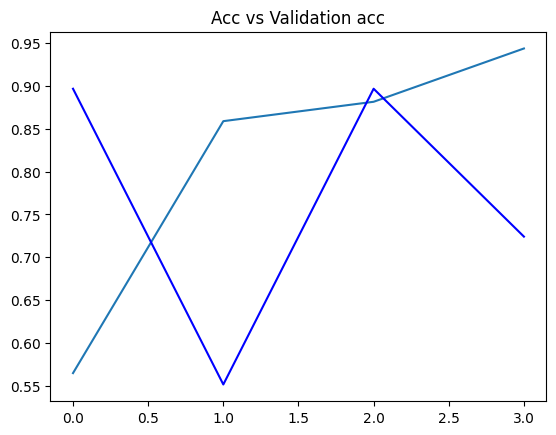

In [224]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'blue')
plt.title('Acc vs Validation acc')
plt.show()

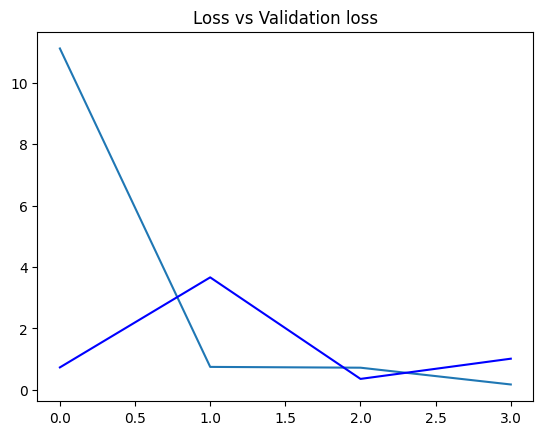

In [225]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'blue')
plt.title('Loss vs Validation loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
the image shows that there is no tumor


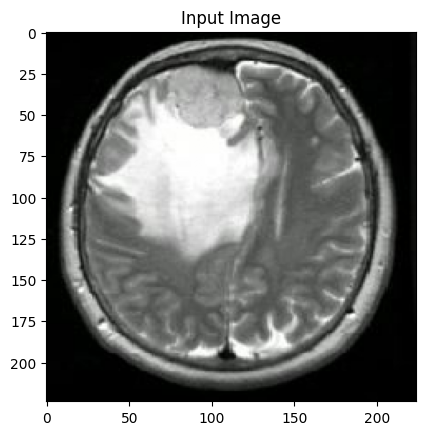

In [226]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

path = "brain_mri_scan_images 2/positive/106.jpg"

img = load_img(path, target_size = (224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))


if pred > 0.5:
    print("The image shows that there is tumor")
else:
    print("the image shows that there is no tumor")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()